In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('edapjt.csv', encoding='utf-8')
df

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022. 1. 1. 오전 12:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022. 1. 1. 오전 12:01:12,-,385000,CARD,385000,-,385000,-
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022. 1. 1. 오전 12:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022. 1. 2. 오전 11:01:24,-,289000,VBANK,289000,-,289000,-


In [4]:
df = df.drop('사이트', axis=1)

In [5]:
df_refund = df[df['유형'] == 'REFUND']
# df_refund['코스(상품) 이름'].to_csv('환불.csv', encoding='utf-8-sig')

df_refund.loc[df_refund['판매가격'] == "-", '판매가격'] = '0'
df_refund['판매가격'] = df_refund['판매가격'].astype(dtype='int64')

df_refund['판매가격'].info()

<class 'pandas.core.series.Series'>
Index: 11318 entries, 1112 to 159327
Series name: 판매가격
Non-Null Count  Dtype
--------------  -----
11318 non-null  int64
dtypes: int64(1)
memory usage: 176.8 KB


/var/folders/kf/605tq0_j3q16f3f02jyfx49m0000gn/T/ipykernel_62476/860907450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refund['판매가격'] = df_refund['판매가격'].astype(dtype='int64')


In [9]:
refund_without_coupon = df_refund[(df_refund['판매가격'])*1 == (df_refund['실거래금액'])*(-1)]
refund_with_coupon = df_refund[~((df_refund['판매가격'])*1 == (df_refund['실거래금액'])*(-1))]
len(refund_with_coupon)

5505

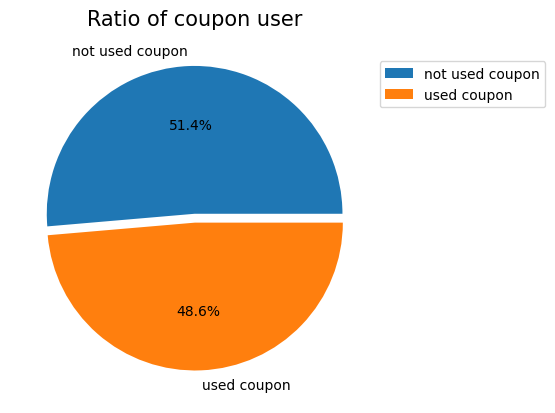

In [17]:
f_data = [len(refund_without_coupon), len(refund_with_coupon)]
labels = ['not used coupon', 'used coupon']
explode = [0.03] * len(f_data) 
title = 'Ratio of coupon user'

plt.pie(f_data,explode=explode ,labels=labels, autopct="%.1f%%")
plt.legend(loc=(1, 0.8))
plt.title(title, fontsize=15)
# plt.savefig('./'+ title +'.png')
plt.show()

In [11]:
red = df[df['코스(상품) 이름'].str.contains('RED')]
# red_refund[red_refund['코스(상품) 이름'].str.contains('김영하')]
# red_refund['코스(상품) 이름'].nunique()
allinone = df[df['코스(상품) 이름'].str.contains('올인원')]
differ = df[df['코스(상품) 이름'].str.contains('초격차')]
neo = df[df['코스(상품) 이름'].str.contains('네오아카데미')]
etc_all_lec = len(df)-len(allinone)-len(red)-len(differ)-len(neo)

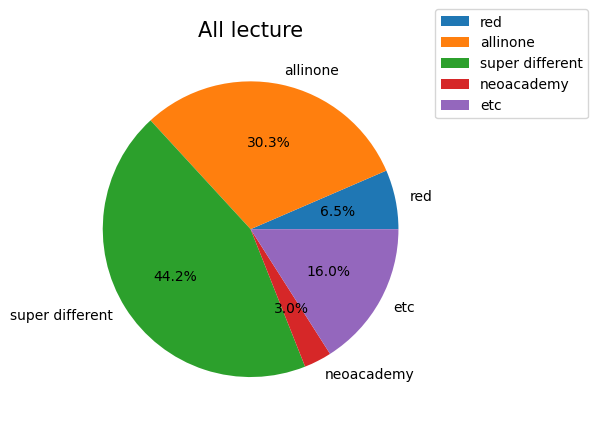

In [16]:
f_data = [len(red), len(allinone), len(differ), len(neo), etc_all_lec]
labels = ['red', 'allinone', 'super different', 'neoacademy','etc']
title = 'All lecture'

plt.pie(f_data, labels=labels ,autopct="%.1f%%")
plt.legend(loc=(1, 0.8))
plt.title(title, fontsize=15)
# plt.savefig('./'+ title +'.png')
plt.show()

In [14]:
red_refund = df_refund[df_refund['코스(상품) 이름'].str.contains('RED')]
# red_refund[red_refund['코스(상품) 이름'].str.contains('김영하')]
# red_refund['코스(상품) 이름'].nunique()
allinone_refund = df_refund[df_refund['코스(상품) 이름'].str.contains('올인원')]
differ_refund = df_refund[df_refund['코스(상품) 이름'].str.contains('초격차')]
neo_refund = df_refund[df_refund['코스(상품) 이름'].str.contains('네오아카데미')]
etc_num = len(df_refund)-len(allinone_refund)-len(red_refund)-len(differ_refund)-len(neo_refund)

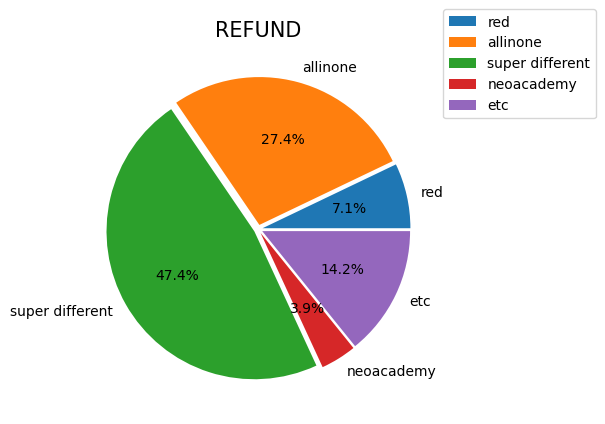

In [18]:
f_data = [len(red_refund), len(allinone_refund), len(differ_refund), len(neo_refund), etc_num]
labels = ['red', 'allinone', 'super different', 'neoacademy','etc']
explode = [0.03] * len(f_data) 
title = 'REFUND'

plt.pie(f_data,explode=explode ,labels=labels, autopct="%.1f%%")
plt.legend(loc=(1, 0.8))
plt.title(title, fontsize=15)
# plt.savefig('./'+ title +'.png')
plt.show()